In [98]:
!git config --global user.email "meganebg17@gmail.com"
!git config --global user.name "Megane-b"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

pathroot = '/home/megane/Documents/0. M1 Neurosciences/17. DESU/rochet/en.openfoodfacts.org.products.csv.gz'


# Chargement donnée

In [4]:
data = pd.read_csv(pathroot, nrows=100000, sep='\t', encoding='utf-8')
data = data[data['nutriscore_grade'].notna()]
print(len(data))
df=data.copy()
df

/tmp/ipykernel_25361/78123153.py:1: DtypeWarning: Columns (11,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(pathroot, nrows=100000, sep='\t', encoding='utf-8')


99495


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,carbohydrates-total_100g
0,54,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1582569031,2020-02-24T18:30:31Z,1733085204,2024-12-01T20:33:24Z,NaN,1740205422,2025-02-22T06:23:42Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1673620307,2023-01-13T14:31:47Z,1750061386,2025-06-16T08:09:46Z,bodysupport,1750061386,2025-06-16T08:09:46Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1580066482,2020-01-26T19:21:22Z,1751035658,2025-06-27T14:47:38Z,teolemon,1751035658,2025-06-27T14:47:38Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,105,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1572117743,2019-10-26T19:22:23Z,1738073570,2025-01-28T14:12:50Z,NaN,1743653496,2025-04-03T04:11:36Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1722606455,2024-08-02T13:47:35Z,1749171851,2025-06-06T01:04:11Z,altroconsumo,1749171851,2025-06-06T01:04:11Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,23545205501,http://world-en.openfoodfacts.org/product/0023...,kiliweb,1676917269,2023-02-20T18:21:09Z,1676917274,2023-02-20T18:21:14Z,kiliweb,1738819276,2025-02-06T05:21:16Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,23545205730,http://world-en.openfoodfacts.org/product/0023...,usda-ndb-import,1489068685,2017-03-09T14:11:25Z,1740274601,2025-02-23T01:36:41Z,NaN,1740274601,2025-02-23T01:36:41Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,23545205822,http://world-en.openfoodfacts.org/product/0023...,kiliweb,1663952455,2022-09-23T17:00:55Z,1680203965,2023-03-30T19:19:25Z,wolfgang8741,1734702506,2024-12-20T13:48:26Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,23545205846,http://world-en.openfoodfacts.org/product/0023...,kiliweb,1675006113,2023-01-29T15:28:33Z,1675064304,2023-01-30T07:38:24Z,chevalstar,1738818713,2025-02-06T05:11:53Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Enlever les duplicatas

In [5]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
df = df.drop_duplicates(keep='first')
len(df)

Number of duplicate rows: 0


99495

# Tri des colonnes + - de 20% de NaN

In [6]:
df_cut = df.drop(columns=['code', 'url', 'creator', 'created_t', 'last_modified_t', 'last_modified_datetime', 'image_url', 'image_small_url', 'created_datetime', 'last_update_t', 'last_updated_datetime', 'last_updated_t', 'last_modified_by', 'countries', 'countries_tags', 'states', 'states_tags', 'states_en'], errors='ignore')
print(df_cut.shape)

percent_missing = df_cut.isnull().sum() * 100 / len(df_cut)
percent_missing.sort_values(ascending=False, inplace=True)
threshold_view = 20

filtered = percent_missing[percent_missing.values > threshold_view]

df_clean = df_cut.drop(columns=filtered.index)
print(df.shape)
print(df_clean.shape)

df_clean.head()

(99495, 193)
(99495, 210)
(99495, 11)


,product_name,countries_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,completeness,energy-kcal_100g,energy_100g,fat_100g,carbohydrates_100g,proteins_100g
0,Limonade artisanale a la rose,France,unknown,unknown,unknown,0.1625,NaN,NaN,NaN,NaN,NaN
1,M&amp;M white,France,unknown,unknown,unknown,0.6625,359.0,1502.0,19.0,26.0,17.0
2,Chocolate n3,France,unknown,unknown,unknown,0.4750,NaN,2415.0,44.0,30.0,7.1
3,Paleta gran reserva - Sierra nevada-,"Germany,Spain",unknown,Beverages,Artificially sweetened beverages,0.6750,NaN,NaN,NaN,NaN,NaN
4,Filets de poulet blanc x2,"Brazil,Germany",not-applicable,unknown,unknown,0.8000,141.0,392.0,2.7,0.9,30.0


# Tri des colonnes

In [7]:
numeric_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
max_categories = len(df_clean.columns)  
ordinal_cols = []
non_ordinal_cols = []

for col in categorical_cols:
    if df_clean[col].nunique() <= max_categories:
        ordinal_cols.append(col)
    else:
        non_ordinal_cols.append(col)

print("Colonnes numériques détectées :", numeric_cols)
print("Colonnes catégorielles détectées :", categorical_cols)
print("Colonnes ordinales détectées :", ordinal_cols)
print("Colonnes non ordinales détectées :", non_ordinal_cols)

Colonnes numériques détectées : ['completeness', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g']
Colonnes catégorielles détectées : ['product_name', 'countries_en', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2']
Colonnes ordinales détectées : ['nutriscore_grade', 'pnns_groups_1']
Colonnes non ordinales détectées : ['product_name', 'countries_en', 'pnns_groups_2']


# Encodage des categories ordonnées + sélecteur de variance à 10%

In [8]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold

ordinal_encoder = OrdinalEncoder()
df_clean[ordinal_cols] = ordinal_encoder.fit_transform(df_clean[ordinal_cols])


datafv3 = df_clean.select_dtypes(include=[np.number])

selector = VarianceThreshold(threshold=0.1)
datafv3 = df_clean.select_dtypes(include=[np.number])
print("Data after variance thresholding:")
print(datafv3.head())
print("Nombre de variables avant selecteur : " , len(datafv3.columns))

datafv3 = datafv3.loc[:, selector.fit(datafv3).get_support()]

print(f"Nombre de variables après selecteur : " , len(datafv3.columns))

Data after variance thresholding:
   nutriscore_grade  pnns_groups_1  completeness  energy-kcal_100g  \
0               6.0           10.0        0.1625               NaN   
1               6.0           10.0        0.6625             359.0   
2               6.0           10.0        0.4750               NaN   
3               6.0            1.0        0.6750               NaN   
4               5.0           10.0        0.8000             141.0   

   energy_100g  fat_100g  carbohydrates_100g  proteins_100g  
0          NaN       NaN                 NaN            NaN  
1       1502.0      19.0                26.0           17.0  
2       2415.0      44.0                30.0            7.1  
3          NaN       NaN                 NaN            NaN  
4        392.0       2.7                 0.9           30.0  
Nombre de variables avant selecteur :  8
Nombre de variables après selecteur :  7


# OneHotEncoding pour les catégories non ordonnées

In [9]:
if 'product_name' in df_clean.columns:
	df_tempo = df_clean.drop(columns=['product_name'])
else:
	df_tempo = df_clean

non_ordinal_cols_new = [col for col in non_ordinal_cols if col in df_tempo.columns]
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(df_tempo[non_ordinal_cols_new])

df_encoded = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(non_ordinal_cols_new))
print("Nombre de variables avant selecteur : " , len(df_encoded.columns))


Nombre de variables avant selecteur :  502


# selecteur de variance à 10%

In [10]:
df_encoded = df_encoded.loc[:, selector.fit(df_encoded).get_support()]
print(f"Nombre de variables après selecteur : " , len(df_encoded.columns))

Nombre de variables après selecteur :  2


# Regroupement de tout dans un tableur

In [11]:
final_df = pd.concat([datafv3.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)
print(final_df.columns)

Index(['nutriscore_grade', 'pnns_groups_1', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'carbohydrates_100g', 'proteins_100g',
       'countries_en_United States', 'pnns_groups_2_unknown'],
      dtype='object')


In [12]:
final_df

,nutriscore_grade,pnns_groups_1,energy-kcal_100g,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,countries_en_United States,pnns_groups_2_unknown
0,6.0,10.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,6.0,10.0,359.000000,1502.0,19.00,26.00,17.0,0.0,1.0
2,6.0,10.0,NaN,2415.0,44.00,30.00,7.1,0.0,1.0
3,6.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,5.0,10.0,141.000000,392.0,2.70,0.90,30.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
99490,6.0,10.0,66.666667,279.0,0.00,10.00,0.0,1.0,1.0
99491,1.0,10.0,845.000000,3530.0,5.67,181.00,17.0,1.0,1.0
99492,0.0,5.0,60.000000,251.0,1.50,1.00,11.0,1.0,0.0
99493,6.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0


# Isolation Forest pour identifier les outliers

Outliers : 4975 on 99495 total samples
Pourcentage d'outliers : 5.00%


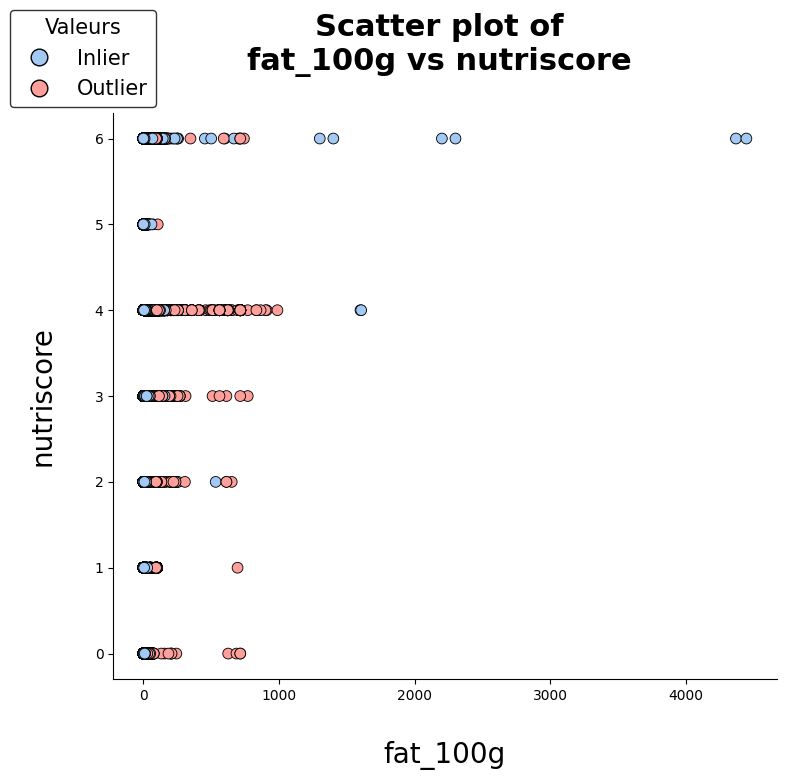

In [13]:
from sklearn.ensemble import IsolationForest
from matplotlib.lines import Line2D

model = IsolationForest(contamination=0.05, random_state=42)
preds = model.fit_predict(final_df)
outlier_indices = np.where(preds == -1)[0]
print(f"Outliers : {len(outlier_indices)} on {len(final_df)} total samples")
print (f'Pourcentage d\'outliers : {len(outlier_indices) / len(final_df) * 100:.2f}%')
cmap = sns.color_palette("pastel")

plt.figure(figsize=(8, 8))
palette = {1: cmap[0], -1: cmap[3]}
pax = sns.scatterplot(
    x=final_df['fat_100g'],
    y=final_df['nutriscore_grade'],
    hue=preds,
    palette=palette,
    edgecolor='k',
    s=60,
    legend=False
)
plt.xlabel('\nfat_100g', fontsize=20)
plt.ylabel('nutriscore\n', fontsize=20)
plt.title("Scatter plot of \nfat_100g vs nutriscore \n", fontsize=22, fontweight='bold')
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Inlier', markerfacecolor=cmap[0], markersize=12, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Outlier', markerfacecolor=cmap[3], markersize=12, markeredgecolor='k')
]
plt.legend(handles=legend_elements, title="Valeurs", fontsize=15, title_fontsize=15, frameon=True, loc='upper right', bbox_to_anchor=(0.08, 1.2), framealpha=0.8, edgecolor='black')
plt.tight_layout()
plt.savefig('fat_100g_vs_nutriscore_outliers.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [14]:
final_df_so = final_df[~final_df.index.isin(outlier_indices)]
print(f"Nombre d'outliers = {len(outlier_indices)}")
print(f"DataFrame propre des outliers: {final_df_so.shape[0]} lignes restantes sur {final_df.shape[0]} lignes initiales")

Nombre d'outliers = 4975
DataFrame propre des outliers: 94520 lignes restantes sur 99495 lignes initiales


Gardons les outliers

# KNNImputer

In [15]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
final_df2_sans_na_array = imputer.fit_transform(final_df)
final_df2_sans_na = pd.DataFrame(final_df2_sans_na_array, columns=final_df.columns)
final_df2_sans_na

,nutriscore_grade,pnns_groups_1,energy-kcal_100g,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,countries_en_United States,pnns_groups_2_unknown
0,6.0,10.0,325.923077,1029.4,3.444667,51.24000,10.220000,0.0,1.0
1,6.0,10.0,359.000000,1502.0,19.000000,26.00000,17.000000,0.0,1.0
2,6.0,10.0,578.000000,2415.0,44.000000,30.00000,7.100000,0.0,1.0
3,6.0,1.0,92.400000,310.0,4.019000,21.26064,8.508800,0.0,0.0
4,5.0,10.0,141.000000,392.0,2.700000,0.90000,30.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...
99490,6.0,10.0,66.666667,279.0,0.000000,10.00000,0.000000,1.0,1.0
99491,1.0,10.0,845.000000,3530.0,5.670000,181.00000,17.000000,1.0,1.0
99492,0.0,5.0,60.000000,251.0,1.500000,1.00000,11.000000,1.0,0.0
99493,6.0,5.0,249.400000,1218.4,2.820478,1.56800,13.773143,1.0,0.0


# Split + scaling

In [16]:
from sklearn.model_selection import train_test_split
X = final_df2_sans_na.drop(columns=['nutriscore_grade'])
y = final_df2_sans_na['nutriscore_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForestClassifier - CVO = 0.7940

## Calcul

✅ Random Forest Accuracy: 0.8013


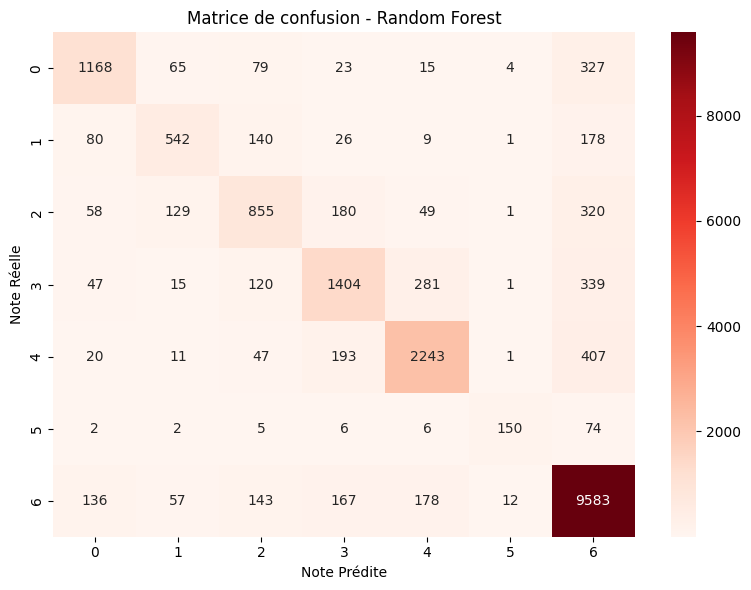

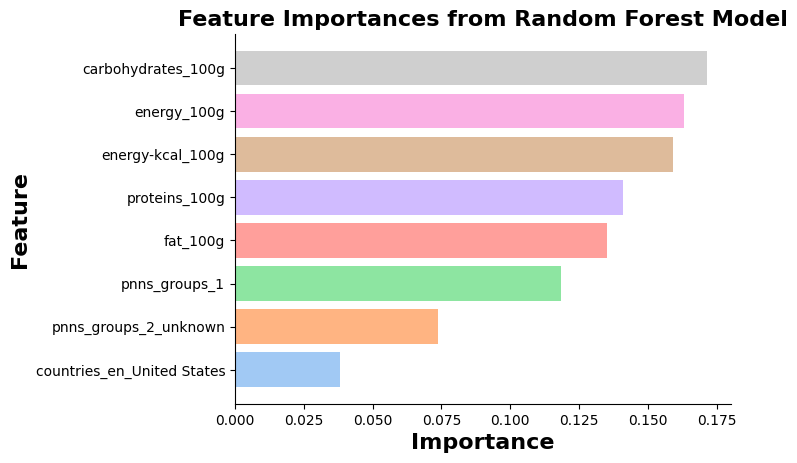

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df_X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_y_train = pd.DataFrame(y_train)

model = RandomForestClassifier(
    n_estimators=212,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

model.fit(X_train_scaled, y_train)

feature_importances = pd.DataFrame({
    'Feature': df_X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=True)

pred_classes = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, pred_classes)
print(f'Random Forest Accuracy: {accuracy:.4f}')

cm = confusion_matrix(y_test, pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Note Prédite')
plt.ylabel('Note Réelle')
plt.title('Matrice de confusion - Random Forest')
plt.tight_layout()
plt.savefig('confusion_matrix_rf.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

colors = sns.color_palette("pastel", len(feature_importances))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color=colors)
plt.title('Feature Importances from Random Forest Model', fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Importance', fontsize=16, fontweight='bold')
plt.ylabel('Feature', fontsize=16, fontweight='bold')
plt.savefig('feature_importances_rf.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(
    n_estimators=212,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Validation croisée : {scores}")
print(f"Accuracy moyenne : {np.mean(scores):.4f}")


✅ Validation croisée : [0.79070352 0.794271   0.79778881 0.79401972 0.79320309]
✅ Accuracy moyenne : 0.7940


## Estimation des hyperparamètres

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# rf = RandomForestClassifier(random_state=42)

# param_dist = {
#     'n_estimators': randint(100, 300),
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 4)
# }

# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=100,  
#     cv=5,
#     scoring='accuracy',
#     verbose=2,
#     n_jobs=-1,
#     random_state=42
# )
# random_search.fit(X_train, y_train)

# print("Meilleurs paramètres trouvés: ", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=174; total time=  18.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=174; total time=  18.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=174; total time=  18.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=174; total time=  18.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=174; total time=  18.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=  32.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=  33.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=  34.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=  35.3s
[CV] END max_depth=20, min_s

Meilleurs paramètres trouvés:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 212}

# XGBoost - CVO = 0.7848

## Optimisation des hyperparamètres

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# model = XGBClassifier(objective='multi:softmax', random_state=42)

# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'n_estimators': [100, 200, 300]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                            cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# grid_search.fit(X_train_scaled, y_train)

# print("Meilleurs paramètres trouvés: ", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   8.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   8.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   9.0s
[CV] END

Meilleurs paramètres trouvés:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

## Calcul

XGBoost Accuracy: 0.7936


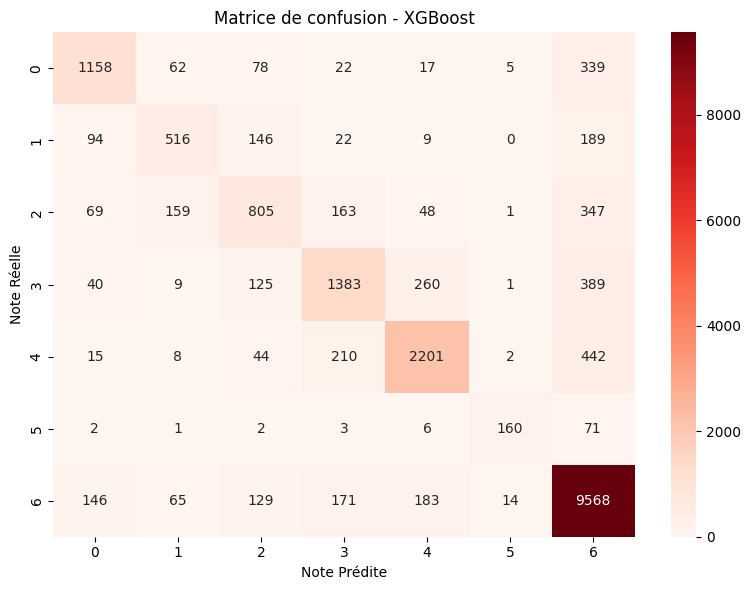

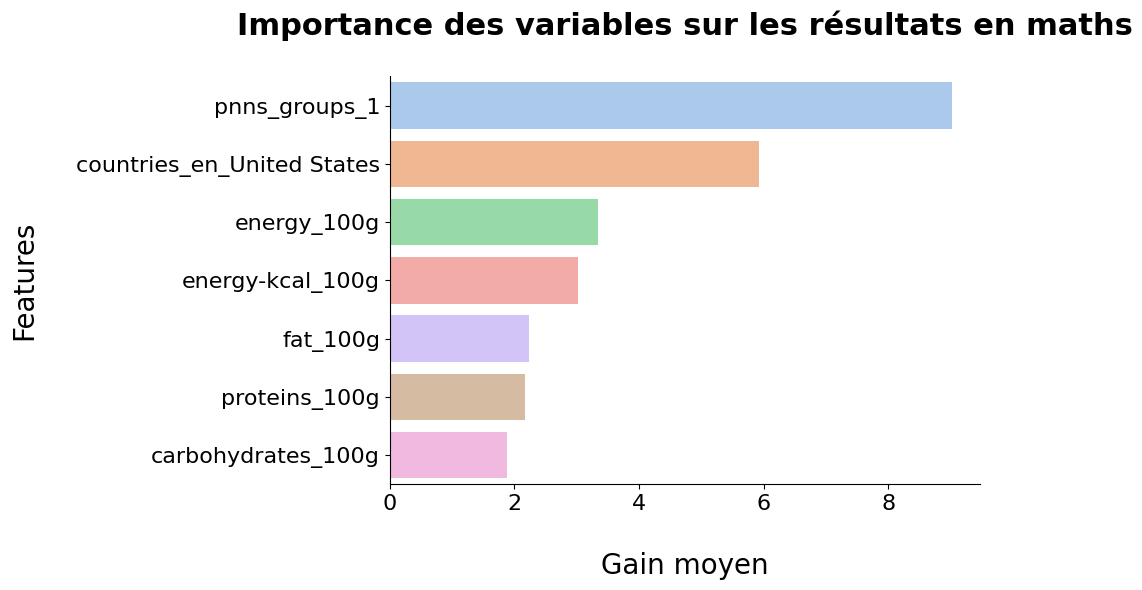

In [ ]:
import xgboost as xgb

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

dtrain = xgb.DMatrix(X_train_scaled_df, label=y_train, feature_names=X_train.columns.tolist())
dtest = xgb.DMatrix(X_test_scaled_df, label=y_test, feature_names=X_test.columns.tolist())

params = {
    'objective': 'multi:softmax',
    'eval_metric': 'merror',
    'num_class': 7,
    'max_depth': 7,
    'eta': 0.2,
    'subsample': 0.9,
    'colsample_bytree': 1.0,
    'min_child_weight': 1,
    'gamma': 0,
    'alpha': 0.1,
    'lambda': 1, 
}

model = xgb.train(params, dtrain, num_boost_round=300)

predictions = model.predict(dtest)
accuracy = accuracy_score(y_test, predictions)
print(f'XGBoost Accuracy: {accuracy:.4f}')

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_scaled, label=y_train, feature_names=X_train.columns.tolist())

params = {
    'objective': 'multi:softmax',
    'eval_metric': 'merror',
    'num_class': 7,
    'max_depth': 7,
    'eta': 0.2,
    'subsample': 0.9,
    'colsample_bytree': 1.0,
    'min_child_weight': 1,
    'gamma': 0,
    'alpha': 0.1,
    'lambda': 1,
}

cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=300,
    nfold=5,
    stratified=True,  
    metrics='merror',
    early_stopping_rounds=20,
    verbose_eval=True,
    seed=42
)

best_num_boost_rounds = cv_results['test-merror-mean'].argmin()
print(f"\nMeilleur nombre de rounds : {best_num_boost_rounds}")
print(f"Accuracy moyenne en validation croisée : {1 - cv_results['test-merror-mean'].min():.4f}")


[0]	train-merror:0.27978+0.00199	test-merror:0.28723+0.00190
[1]	train-merror:0.27010+0.00166	test-merror:0.27844+0.00302
[2]	train-merror:0.26722+0.00060	test-merror:0.27607+0.00280
[3]	train-merror:0.26395+0.00078	test-merror:0.27241+0.00341
[4]	train-merror:0.26181+0.00091	test-merror:0.27140+0.00364
[5]	train-merror:0.25958+0.00089	test-merror:0.26937+0.00353
[6]	train-merror:0.25768+0.00067	test-merror:0.26756+0.00331
[7]	train-merror:0.25636+0.00067	test-merror:0.26677+0.00389
[8]	train-merror:0.25475+0.00108	test-merror:0.26617+0.00375
[9]	train-merror:0.25336+0.00122	test-merror:0.26482+0.00352
[10]	train-merror:0.25185+0.00112	test-merror:0.26421+0.00356
[11]	train-merror:0.25040+0.00089	test-merror:0.26319+0.00379
[12]	train-merror:0.24916+0.00084	test-merror:0.26200+0.00384
[13]	train-merror:0.24799+0.00081	test-merror:0.26141+0.00428
[14]	train-merror:0.24649+0.00074	test-merror:0.25977+0.00399
[15]	train-merror:0.24491+0.00095	test-merror:0.25897+0.00379
[16]	train-merror:

Accuracy moyenne en validation croisée : 0.7848

# Catboost - CVO = 0.7763

## Modele

In [ ]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier(
    iterations=300,           
    learning_rate=0.28731125008662456,        
    depth=10,                 
    l2_leaf_reg=0.016833203392962015,          
    random_seed=42,
    verbose=0
)

model_cb.fit(X_train_scaled, y_train)
preds_cb = model_cb.predict(X_test_scaled)
accuracy_cb = accuracy_score(y_test, preds_cb)
print(f"CatBoost Accuracy: {accuracy_cb:.4f}")


CatBoost Accuracy: 0.7797


## Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

model_cb = CatBoostClassifier(
    iterations=300,            
    learning_rate=0.28731125008662456,       
    depth=10,                  
    l2_leaf_reg=0.016833203392962015,          
    random_seed=42,
    verbose=0
)

scores = cross_val_score(model_cb, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Scores par fold : {np.round(scores, 4)}")
print(f"Accuracy moyenne en validation croisée : {scores.mean():.4f}")


Scores par fold : [0.774  0.7764 0.7758 0.7806 0.7745]
✅ Accuracy moyenne en validation croisée : 0.7763


## Optimisation des parametres

In [ ]:
# import optuna
# from catboost import CatBoostClassifier, Pool

# def objective(trial):
#     params = {
#         'depth': trial.suggest_int('depth', 4, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True),
#         'iterations': 300,
#         'random_seed': 42,
#         'verbose': 0,
#         'task_type': 'CPU' 
#     }
    
#     model = CatBoostClassifier(**params)
    
#     scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
#     return scores.mean()

# study = optuna.create_study(direction='maximize')

# study.optimize(objective, n_trials=50)

# print("Meilleurs paramètres : ", study.best_params)
# print(f"Meilleure accuracy CV : {study.best_value:.4f}")


[I 2025-07-11 23:03:56,303] A new study created in memory with name: no-name-2a66a7bf-fd4b-455f-8fc7-20918c1a2e1d
[I 2025-07-11 23:04:12,432] Trial 0 finished with value: 0.7409041059307467 and parameters: {'depth': 4, 'learning_rate': 0.2945192167546004, 'l2_leaf_reg': 9.069286125054967}. Best is trial 0 with value: 0.7409041059307467.
[I 2025-07-11 23:05:50,515] Trial 1 finished with value: 0.769536186018351 and parameters: {'depth': 10, 'learning_rate': 0.13216875068248662, 'l2_leaf_reg': 0.22725392884792953}. Best is trial 1 with value: 0.769536186018351.
[I 2025-07-11 23:06:11,639] Trial 2 finished with value: 0.7339313992539493 and parameters: {'depth': 6, 'learning_rate': 0.06218095042390907, 'l2_leaf_reg': 0.43071685025636236}. Best is trial 1 with value: 0.769536186018351.
[I 2025-07-11 23:07:12,855] Trial 3 finished with value: 0.7097718751114704 and parameters: {'depth': 9, 'learning_rate': 0.009684863476213902, 'l2_leaf_reg': 1.090272775671238}. Best is trial 1 with value: 

Meilleurs paramètres :  {'depth': 10, 'learning_rate': 0.28731125008662456, 'l2_leaf_reg': 0.016833203392962015}
Meilleure accuracy CV : 0.7763


Meilleurs paramètres :  {'depth': 10, 'learning_rate': 0.28731125008662456, 'l2_leaf_reg': 0.016833203392962015}

Meilleure accuracy CV : 0.7763

# LightGBM - CV : 0.7769

In [ ]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=7,
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=1.0,
    reg_alpha=0.1,
    reg_lambda=1
)

model_lgb.fit(X_train_scaled, y_train)

preds_lgb = model_lgb.predict(X_test_scaled)

accuracy_lgb = accuracy_score(y_test, preds_lgb)
print(f"Accuracy LightGBM sans validation croisée : {accuracy_lgb:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,009368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 79596, number of used features: 8
[LightGBM] [Info] Start training from score -2,484002
[LightGBM] [Info] Start training from score -3,010872
[LightGBM] [Info] Start training from score -2,507164
[LightGBM] [Info] Start training from score -2,212148
[LightGBM] [Info] Start training from score -1,879141
[LightGBM] [Info] Start training from score -4,421961
[LightGBM] [Info] Start training from score -0,670122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [ ]:
scores = cross_val_score(model_lgb, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Scores par fold : {np.round(scores, 4)}")
print(f"Accuracy moyenne en validation croisée LightGBM : {scores.mean():.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,002614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 63676, number of used features: 8
[LightGBM] [Info] Start training from score -2,484028
[LightGBM] [Info] Start training from score -3,010860
[LightGBM] [Info] Start training from score -2,507074
[LightGBM] [Info] Start training from score -2,212049
[LightGBM] [Info] Start training from score -1,879211
[LightGBM] [Info] Start training from score -4,422995
[LightGBM] [Info] Start training from score -0,670109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

### Optimisation du LightGBM

Trop long ca me soule

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# param_dist = {
#     'n_estimators': randint(100, 400),
#     'learning_rate': uniform(0.03, 0.2),        
#     'max_depth': randint(4, 10),
#     'subsample': uniform(0.8, 0.2),             
#     'colsample_bytree': uniform(0.8, 0.2),       
#     'reg_alpha': uniform(0.0, 0.5),
#     'reg_lambda': uniform(0.0, 1.0)
# }

# lgbm = lgb.LGBMClassifier(
#     objective='multiclass',
#     num_class=7,
#     random_state=42
# )

# random_search = RandomizedSearchCV(
#     estimator=lgbm,
#     param_distributions=param_dist,
#     n_iter=20,
#     cv=5,
#     scoring='accuracy',
#     verbose=1,
#     random_state=42,
#     n_jobs=-1,
#     return_train_score=True
# )

# random_search.fit(X_train_scaled, y_train)

# print(f"\nBest Accuracy (CV moyenne) : {random_search.best_score_:.4f}")
# print("Meilleurs hyperparamètres :")
# for param, value in random_search.best_params_.items():
#     print(f"   ▸ {param}: {value}")

# # results_df = pd.DataFrame(random_search.cv_results_)
# results_df = results_df.sort_values(by='mean_test_score', ascending=False)
# results_df[['mean_test_score', 'std_test_score', 'params']].head()


# Reseau de neurones - 200 epoch = 0.73

Epoch 1/200
2225/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4011 - loss: 2.7192

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4016 - loss: 2.7171 - val_accuracy: 0.6276 - val_loss: 1.8605 - learning_rate: 1.0000e-04
Epoch 2/200
2237/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5698 - loss: 2.0160

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5698 - loss: 2.0159 - val_accuracy: 0.6325 - val_loss: 1.7399 - learning_rate: 1.0000e-04
Epoch 3/200
2236/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5904 - loss: 1.8194

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5904 - loss: 1.8193 - val_accuracy: 0.6371 - val_loss: 1.6298 - learning_rate: 1.0000e-04
Epoch 4/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6077 - loss: 1.6655 - val_accuracy: 0.6364 - val_loss: 1.5222 - learning_rate: 1.0000e-04
Epoch 5/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6150 - loss: 1.5440 - val_accuracy: 0.6319 - val_loss: 1.4866 - learning_rate: 1.0000e-04
Epoch 6/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6234 - loss: 1.4326 - val_accuracy: 0.5997 - val_loss: 1.4693 - learning_rate: 1.0000e-04
Epoch 7/200
2230/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6290 - loss: 1.3513

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6290 - loss: 1.3513 - val_accuracy: 0.6401 - val_loss: 1.3041 - learning_rate: 1.0000e-04
Epoch 8/200
2229/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6399 - loss: 1.2805

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6399 - loss: 1.2804 - val_accuracy: 0.6534 - val_loss: 1.2304 - learning_rate: 1.0000e-04
Epoch 9/200
2229/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 1.2296

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6390 - loss: 1.2296 - val_accuracy: 0.6667 - val_loss: 1.1262 - learning_rate: 1.0000e-04
Epoch 10/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6454 - loss: 1.1814 - val_accuracy: 0.6601 - val_loss: 1.1866 - learning_rate: 1.0000e-04
Epoch 11/200
2233/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6479 - loss: 1.1460

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6479 - loss: 1.1459 - val_accuracy: 0.6691 - val_loss: 1.1290 - learning_rate: 1.0000e-04
Epoch 12/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 1.1095

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6566 - loss: 1.1095 - val_accuracy: 0.6825 - val_loss: 1.0692 - learning_rate: 1.0000e-04
Epoch 13/200
2238/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6569 - loss: 1.0878

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6569 - loss: 1.0878 - val_accuracy: 0.6908 - val_loss: 1.0157 - learning_rate: 1.0000e-04
Epoch 14/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6653 - loss: 1.0555 - val_accuracy: 0.6898 - val_loss: 1.0008 - learning_rate: 1.0000e-04
Epoch 15/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6699 - loss: 1.0396

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6699 - loss: 1.0396 - val_accuracy: 0.6942 - val_loss: 0.9834 - learning_rate: 1.0000e-04
Epoch 16/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6727 - loss: 1.0279 - val_accuracy: 0.6765 - val_loss: 1.1605 - learning_rate: 1.0000e-04
Epoch 17/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6714 - loss: 1.0182 - val_accuracy: 0.6920 - val_loss: 0.9946 - learning_rate: 1.0000e-04
Epoch 18/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6771 - loss: 0.9987 - val_accuracy: 0.6780 - val_loss: 1.0747 - learning_rate: 1.0000e-04
Epoch 19/200
2233/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.9853

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6791 - loss: 0.9853 - val_accuracy: 0.6982 - val_loss: 0.9328 - learning_rate: 1.0000e-04
Epoch 20/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6792 - loss: 0.9778 - val_accuracy: 0.6962 - val_loss: 0.9819 - learning_rate: 1.0000e-04
Epoch 21/200
2225/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.9752

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6809 - loss: 0.9752 - val_accuracy: 0.7008 - val_loss: 0.9570 - learning_rate: 1.0000e-04
Epoch 22/200
2235/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.9638

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6812 - loss: 0.9638 - val_accuracy: 0.7015 - val_loss: 0.9213 - learning_rate: 1.0000e-04
Epoch 23/200
2230/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6849 - loss: 0.9553

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6849 - loss: 0.9553 - val_accuracy: 0.7029 - val_loss: 0.9035 - learning_rate: 1.0000e-04
Epoch 24/200
2230/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.9498

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6836 - loss: 0.9498 - val_accuracy: 0.7039 - val_loss: 0.8927 - learning_rate: 1.0000e-04
Epoch 25/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6893 - loss: 0.9420 - val_accuracy: 0.6658 - val_loss: 1.1854 - learning_rate: 1.0000e-04
Epoch 26/200
2235/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.9369

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6893 - loss: 0.9369 - val_accuracy: 0.7060 - val_loss: 0.8798 - learning_rate: 1.0000e-04
Epoch 27/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6916 - loss: 0.9341 - val_accuracy: 0.7058 - val_loss: 0.8840 - learning_rate: 1.0000e-04
Epoch 28/200
2233/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6884 - loss: 0.9317

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6884 - loss: 0.9317 - val_accuracy: 0.7080 - val_loss: 0.8664 - learning_rate: 1.0000e-04
Epoch 29/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6926 - loss: 0.9251 - val_accuracy: 0.6751 - val_loss: 1.0881 - learning_rate: 1.0000e-04
Epoch 30/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6920 - loss: 0.9216 - val_accuracy: 0.6784 - val_loss: 1.1167 - learning_rate: 1.0000e-04
Epoch 31/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6914 - loss: 0.9153 - val_accuracy: 0.7035 - val_loss: 0.8937 - learning_rate: 1.0000e-04
Epoch 32/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6904 - loss: 0.9186 - val_accuracy: 0.6828 - val_loss: 1.0591 - learning_rate: 1.0000e-04
Epoch 33/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6911 - loss: 0.9171 - val_accuracy: 0.7024 - val_loss: 0.9250 - learning_rate: 1.0000e-04
Epoch 34/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/st

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6984 - loss: 0.8997 - val_accuracy: 0.7109 - val_loss: 0.8466 - learning_rate: 1.0000e-04
Epoch 40/200
2218/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6980 - loss: 0.8985

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6980 - loss: 0.8985 - val_accuracy: 0.7128 - val_loss: 0.8431 - learning_rate: 1.0000e-04
Epoch 41/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6995 - loss: 0.8952 - val_accuracy: 0.6376 - val_loss: 1.1453 - learning_rate: 1.0000e-04
Epoch 42/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6979 - loss: 0.8950 - val_accuracy: 0.6845 - val_loss: 0.9831 - learning_rate: 1.0000e-04
Epoch 43/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6992 - loss: 0.8929 - val_accuracy: 0.6712 - val_loss: 0.9066 - learning_rate: 1.0000e-04
Epoch 44/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7010 - loss: 0.8967 - val_accuracy: 0.7003 - val_loss: 0.8867 - learning_rate: 1.0000e-04
Epoch 45/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6958 - loss: 0.8988 - val_accuracy: 0.6686 - val_loss: 0.9661 - learning_rate: 1.0000e-04
Epoch 46/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/st

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6960 - loss: 0.8963 - val_accuracy: 0.7138 - val_loss: 0.8386 - learning_rate: 1.0000e-04
Epoch 48/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6977 - loss: 0.8942 - val_accuracy: 0.5951 - val_loss: 1.2151 - learning_rate: 1.0000e-04
Epoch 49/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7011 - loss: 0.8889 - val_accuracy: 0.6969 - val_loss: 0.8929 - learning_rate: 1.0000e-04
Epoch 50/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7002 - loss: 0.8885 - val_accuracy: 0.7113 - val_loss: 0.8378 - learning_rate: 1.0000e-04
Epoch 51/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7002 - loss: 0.8871 - val_accuracy: 0.6450 - val_loss: 0.9957 - learning_rate: 1.0000e-04
Epoch 52/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7009 - loss: 0.8883 - val_accuracy: 0.6984 - val_loss: 0.8719 - learning_rate: 1.0000e-04
Epoch 53/200
2227/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6992 - loss: 0.8798 - val_accuracy: 0.7175 - val_loss: 0.8304 - learning_rate: 1.0000e-04
Epoch 54/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7000 - loss: 0.8818 - val_accuracy: 0.7156 - val_loss: 0.8315 - learning_rate: 1.0000e-04
Epoch 55/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6990 - loss: 0.8836 - val_accuracy: 0.7163 - val_loss: 0.8303 - learning_rate: 1.0000e-04
Epoch 56/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7028 - loss: 0.8767 - val_accuracy: 0.6976 - val_loss: 0.8981 - learning_rate: 1.0000e-04
Epoch 57/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7042 - loss: 0.8823 - val_accuracy: 0.5568 - val_loss: 1.2313 - learning_rate: 1.0000e-04
Epoch 58/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7037 - loss: 0.8772 - val_accuracy: 0.7153 - val_loss: 0.8339 - learning_rate: 1.0000e-04
Epoch 59/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/st

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7113 - loss: 0.8516 - val_accuracy: 0.7177 - val_loss: 0.8155 - learning_rate: 2.0000e-05
Epoch 74/200
2232/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7149 - loss: 0.8434

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7149 - loss: 0.8434 - val_accuracy: 0.7190 - val_loss: 0.8115 - learning_rate: 2.0000e-05
Epoch 75/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7164 - loss: 0.8433 - val_accuracy: 0.5687 - val_loss: 1.1315 - learning_rate: 2.0000e-05
Epoch 76/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7126 - loss: 0.8435 - val_accuracy: 0.5657 - val_loss: 1.1299 - learning_rate: 2.0000e-05
Epoch 77/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7148 - loss: 0.8403 - val_accuracy: 0.4940 - val_loss: 1.3610 - learning_rate: 2.0000e-05
Epoch 78/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7170 - loss: 0.8346 - val_accuracy: 0.7148 - val_loss: 0.8215 - learning_rate: 2.0000e-05
Epoch 79/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7126 - loss: 0.8371 - val_accuracy: 0.7175 - val_loss: 0.8087 - learning_rate: 2.0000e-05
Epoch 80/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/st

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7167 - loss: 0.8397 - val_accuracy: 0.7205 - val_loss: 0.8046 - learning_rate: 2.0000e-05
Epoch 84/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7172 - loss: 0.8349 - val_accuracy: 0.7200 - val_loss: 0.8012 - learning_rate: 2.0000e-05
Epoch 85/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7158 - loss: 0.8322 - val_accuracy: 0.5028 - val_loss: 1.2909 - learning_rate: 2.0000e-05
Epoch 86/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7195 - loss: 0.8306 - val_accuracy: 0.6931 - val_loss: 0.8750 - learning_rate: 2.0000e-05
Epoch 87/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7212 - loss: 0.8274 - val_accuracy: 0.6938 - val_loss: 0.8746 - learning_rate: 2.0000e-05
Epoch 88/200
2225/2239 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.8296

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7193 - loss: 0.8296 - val_accuracy: 0.7291 - val_loss: 0.7850 - learning_rate: 2.0000e-05
Epoch 89/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7183 - loss: 0.8260 - val_accuracy: 0.7180 - val_loss: 0.8116 - learning_rate: 2.0000e-05
Epoch 90/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7175 - loss: 0.8308 - val_accuracy: 0.7161 - val_loss: 0.8216 - learning_rate: 2.0000e-05
Epoch 91/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7179 - loss: 0.8281 - val_accuracy: 0.7095 - val_loss: 0.8347 - learning_rate: 2.0000e-05
Epoch 92/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7191 - loss: 0.8278 - val_accuracy: 0.6496 - val_loss: 0.9957 - learning_rate: 2.0000e-05
Epoch 93/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7174 - loss: 0.8278 - val_accuracy: 0.6445 - val_loss: 0.9950 - learning_rate: 2.0000e-05
Epoch 94/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/st

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7136 - loss: 0.8346 - val_accuracy: 0.7303 - val_loss: 0.7866 - learning_rate: 2.0000e-05
Epoch 96/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7166 - loss: 0.8299 - val_accuracy: 0.7274 - val_loss: 0.7853 - learning_rate: 2.0000e-05
Epoch 97/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7219 - loss: 0.8243 - val_accuracy: 0.7247 - val_loss: 0.7948 - learning_rate: 2.0000e-05
Epoch 98/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7179 - loss: 0.8254 - val_accuracy: 0.7260 - val_loss: 0.7863 - learning_rate: 2.0000e-05
Epoch 99/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7168 - loss: 0.8294 - val_accuracy: 0.7136 - val_loss: 0.8248 - learning_rate: 4.0000e-06
Epoch 100/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7212 - loss: 0.8211 - val_accuracy: 0.7201 - val_loss: 0.8112 - learning_rate: 4.0000e-06
Epoch 101/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7198 - loss: 0.8222 - val_accuracy: 0.7310 - val_loss: 0.7804 - learning_rate: 8.0000e-07
Epoch 123/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7183 - loss: 0.8247 - val_accuracy: 0.7309 - val_loss: 0.7783 - learning_rate: 8.0000e-07
Epoch 124/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7199 - loss: 0.8180 - val_accuracy: 0.7146 - val_loss: 0.8173 - learning_rate: 8.0000e-07
Epoch 125/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7201 - loss: 0.8138 - val_accuracy: 0.7097 - val_loss: 0.8327 - learning_rate: 8.0000e-07
Epoch 126/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7238 - loss: 0.8145 - val_accuracy: 0.6697 - val_loss: 0.8828 - learning_rate: 8.0000e-07
Epoch 127/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7209 - loss: 0.8196 - val_accuracy: 0.7308 - val_loss: 0.7819 - learning_rate: 8.0000e-07
Epoch 128/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7232 - loss: 0.8136 - val_accuracy: 0.7320 - val_loss: 0.7755 - learning_rate: 8.0000e-07
Epoch 131/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7226 - loss: 0.8104 - val_accuracy: 0.5933 - val_loss: 1.0953 - learning_rate: 8.0000e-07
Epoch 132/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7187 - loss: 0.8196 - val_accuracy: 0.5497 - val_loss: 1.1532 - learning_rate: 8.0000e-07
Epoch 133/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7201 - loss: 0.8166 - val_accuracy: 0.7136 - val_loss: 0.8223 - learning_rate: 8.0000e-07
Epoch 134/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7201 - loss: 0.8176 - val_accuracy: 0.6984 - val_loss: 0.8556 - learning_rate: 8.0000e-07
Epoch 135/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7226 - loss: 0.8220 - val_accuracy: 0.7263 - val_loss: 0.7905 - learning_rate: 8.0000e-07
Epoch 136/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7217 - loss: 0.8128 - val_accuracy: 0.7323 - val_loss: 0.7763 - learning_rate: 1.6000e-07
Epoch 147/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7217 - loss: 0.8184 - val_accuracy: 0.7237 - val_loss: 0.7953 - learning_rate: 1.6000e-07
Epoch 148/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7201 - loss: 0.8213 - val_accuracy: 0.7069 - val_loss: 0.8451 - learning_rate: 1.6000e-07
Epoch 149/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7209 - loss: 0.8148 - val_accuracy: 0.5791 - val_loss: 1.1144 - learning_rate: 1.6000e-07
Epoch 150/200
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7182 - loss: 0.8200 - val_accuracy: 0.5632 - val_loss: 1.1363 - learning_rate: 1.6000e-07
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step
Accuracy NN (TensorFlow): 0.7388310970400522


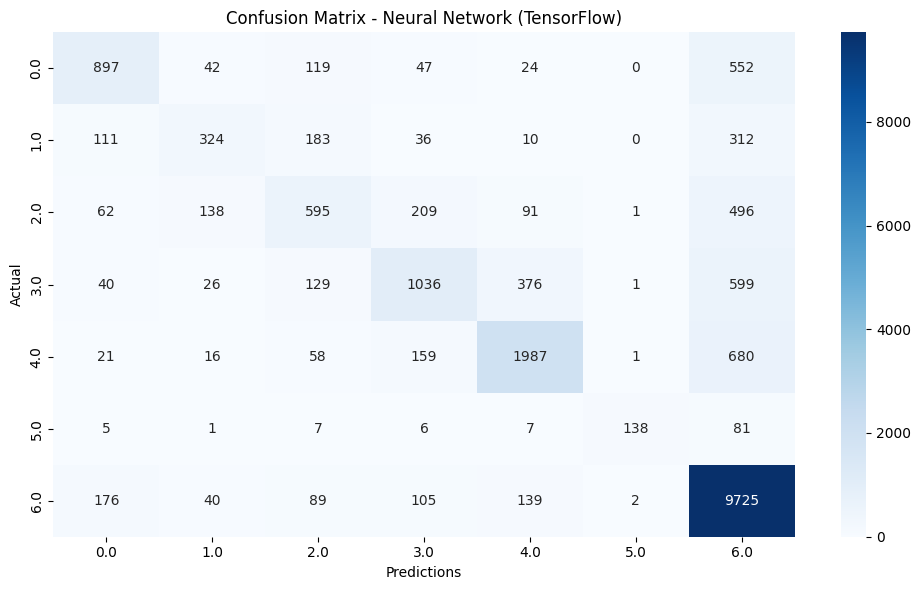

In [ ]:
from tensorflow.keras.layers import BatchNormalization, 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers


def create_model(input_shape):
    input_layer = layers.Input(shape=input_shape)

    x = layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
    x = BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    residual = layers.Dense(256, activation='linear', kernel_regularizer=l2(0.001))(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = layers.add([x, residual])  
    x = layers.Activation('relu')(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    output_layer = layers.Dense(7, activation='softmax')(x)

    model = keras.Model(inputs=input_layer, outputs=output_layer)
    return model

model = create_model((X_train_scaled.shape[1],))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-7)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.1,
                    verbose=1, callbacks=[early_stopping, reduce_lr, model_checkpoint])

y_pred_tf = np.argmax(model.predict(X_test_scaled), axis=1)
acc_tf = accuracy_score(y_test, y_pred_tf)
cm_tf = confusion_matrix(y_test, y_pred_tf)

print("Accuracy NN (TensorFlow):", acc_tf)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_tf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network (TensorFlow)')
plt.tight_layout()
plt.savefig('confusion_matrix_nn_tf.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()



Il reste a choisir un des modeles et l'appliquer sur tout le tableur pour qu'on ait juste un tableur avec le nom des aliments et les nutriscores